In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import time
from PIL import Image
import lmdb

from bc.dataset import Frames, Actions, Scalars
from bc.utils import videos

%matplotlib inline

In [2]:
dataset_path = 'demos'
frames = Frames(dataset_path, channels='rgbd')
actions = Actions(dataset_path, action_space='tool', dim_action=4)
scalars = actions._scalars

In [3]:
idxs_demo = frames.keys.get_demo(1)
frames_demo = frames[idxs_demo]
actions_demo = actions[idxs_demo]
scalars_demo = scalars[idxs_demo]

In [4]:
len(frames), len(actions)

(1154, 1154)

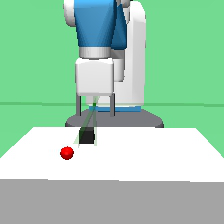

In [5]:
Image.fromarray(frames_demo[10]['rgb'])

In [6]:
num_cam = 1
trajs = []
for i in range(num_cam):
    frames.set_cam_num(i)
    frames_demo = frames[idxs_demo]
    trajs.append(frames_demo)

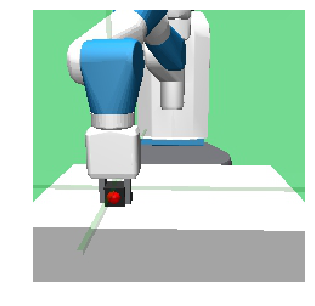

In [7]:
fig = plt.figure(figsize=(5, 5))
axs = []
for i in range(num_cam):
    axs.append(fig.add_subplot(np.sqrt(num_cam), np.sqrt(num_cam), i+1))
    axs[-1].axis('off')
plt.subplots_adjust(wspace=0, hspace=0)

count = 0
for i in tqdm(range(len(trajs[0])//2)):
    for cam in range(num_cam):
        obs_im = trajs[cam][2*i]['rgb'].copy()
        im = axs[cam].imshow(obs_im, cmap='gray')
    fig.canvas.draw()
    time.sleep(0.01)
    count += 1

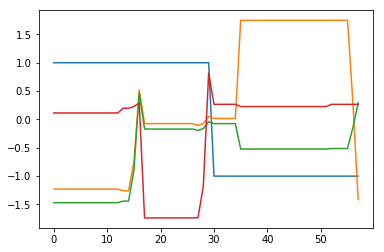

In [8]:
plt.figure()
plt.plot(actions_demo)